# Training WaltDisney dataset on 1980x1080 frames with Net_1080 model

In [1]:
import os
import re
import sys
from PIL import Image
import torch
import shutil
from IPython.display import clear_output
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np

In [2]:
torch.cuda.empty_cache()
torch.cuda.set_device(0)

In [3]:
# from numba import cuda
# cuda.select_device(0)
# cuda.close()

## Preparation of Dataset

In [3]:
cd /home/pytorch/personal/Deep3D/SelfDeep3D/pyFiles_new

/data/personal/Deep3D/SelfDeep3D/pyFiles_new


In [4]:
from dataset_maker import *
from trim_and_LRframes import *
from preprocess import *
from evaluation import *
from postprocess import *

In [8]:
# mp4_file_path = "/3Danimation_dataset/3Danimation.mp4"
# output_folder_path = "/3Danimation_dataset/"
# #outMP4_path = "/home/tensorflow/personal/Dataset/roller_coster/RC_trimmed.mp4"

# t = trimmedFrames(video_path = mp4_file_path, folder_path=output_folder_path)
# t.diff_LR_frames(video_path_user = mp4_file_path)

/home/pytorch/personal/Deep3D/SelfDeep3D/3Danimation_dataset/

Folder named 3Danimation_frames created! 

/home/pytorch/personal/Deep3D/SelfDeep3D/3Danimation_dataset/3Danimation_frames

Extracting frames from Video...



[h264 @ 0x5562bcd75400] error while decoding MB 23 24, bytestream -8



Video frames saved in the folder :  3Danimation_frames

Folder named 3Danimation_LRframes created! 

/home/pytorch/personal/Deep3D/SelfDeep3D/3Danimation_dataset/3Danimation_LRframes

Extracting L-eye and R-eye image from the frames...



Processing ... : 100%|████████████████████████████████████████████| 771/771 [00:18<00:00, 40.87it/s]


L-eye and R-eye separate frames saved in the folder  3Danimation_LRframes


In [5]:
check_image_size('/3Danimation_dataset/3Danimation_LRframes')

All images have the same size.
Image size: (960, 1080)


'/home/pytorch/personal/Deep3D/SelfDeep3D/3Danimation_dataset/3Danimation_LRframes'

In [6]:
# inp_path = "/3Danimation_dataset/3Danimation_LRframes"
# out_path = "/3Danimation_dataset/"

# lr_maker = lrSeperate(inp_path, out_path, 0.90)
# train_L, train_R, test_L, test_R = lr_maker.copy_images()


Respective folders made to save separate frames... 


Total images :  1542
 
Percentage of Images used to train : 90.0 %

Total Train images :  1388

Total Test images :  154

Train images are between out-0000001L.jpg and out-0000694R.jpg

Test images are between out-0000695L.jpg and out-0000771R.jpg



Copying: 100%|██████████| 1388/1388 [00:07<00:00, 189.68it/s]


Train images copied!



Copying: 100%|██████████| 154/154 [00:00<00:00, 186.80it/s]

Test images copied!



In [7]:
check_image_size('/3Danimation_dataset/trainL')
check_image_size('/3Danimation_dataset/trainR')
check_image_size('/3Danimation_dataset/testL')
check_image_size('/3Danimation_dataset/testR')


print("\nno. of Images in trainL: ", len(os.listdir('/3Danimation_dataset/trainL')))
print("no. of Images in trainR: ", len(os.listdir('/3Danimation_dataset/trainR')))
print("no. of Images in testL: ", len(os.listdir('/3Danimation_dataset/testL')))
print("no. of Images in testR: ", len(os.listdir('/3Danimation_dataset/testR')))



All images have the same size.
Image size: (960, 1080)
All images have the same size.
Image size: (960, 1080)
All images have the same size.
Image size: (960, 1080)
All images have the same size.
Image size: (960, 1080)

no. of Images in trainL:  694
no. of Images in trainR:  694
no. of Images in testL:  77
no. of Images in testR:  77


## Dataset Loader

In [8]:
from datasetSample import createSampleDataset
def genTrain_samples(dir_R0, dir_L0, transform, num_images = None):
    trainR0_sample = createSampleDataset(
        dir_R0, transforms=transform, channel_last=False, no_of_images=num_images)
    trainL0_sample = createSampleDataset(
        dir_L0,  transforms=transform, channel_last=False, no_of_images=num_images )
    return trainR0_sample, trainL0_sample

def genTest_samples(dir_R0, dir_L0, transform, num_images = None):
    testR0_sample = createSampleDataset(
        dir_R0, no_of_images=num_images, transforms=transform, channel_last=False ,test = True)
    testL0_sample = createSampleDataset(
        dir_L0, no_of_images=num_images, transforms=transform, channel_last=False, test = True)
    return testR0_sample, testL0_sample

In [9]:
pathR0_train = "/3Danimation_dataset/trainR"
pathL0_train = "/3Danimation_dataset/trainL"

pathR0_test = "/3Danimation_dataset/testR"
pathL0_test = "/3Danimation_dataset/testL"

t = transforms.ToTensor()  # transform image to tensor
# num_samples_train = 100 #no. of training samples
# num_samples_test = 20 #no. of testing samples
trainR0_sample, trainL0_sample = genTrain_samples(
    pathR0_train, pathL0_train, t)#, num_images=num_samples_train)
testR0_sample, testL0_sample = genTest_samples(
    pathR0_test, pathL0_test, t)#, num_images=num_samples_test)

['out-0000001R.jpg', 'out-0000002R.jpg', 'out-0000003R.jpg', 'out-0000004R.jpg', 'out-0000005R.jpg', 'out-0000006R.jpg', 'out-0000007R.jpg', 'out-0000008R.jpg', 'out-0000009R.jpg', 'out-0000010R.jpg', 'out-0000011R.jpg', 'out-0000012R.jpg', 'out-0000013R.jpg', 'out-0000014R.jpg', 'out-0000015R.jpg', 'out-0000016R.jpg', 'out-0000017R.jpg', 'out-0000018R.jpg', 'out-0000019R.jpg', 'out-0000020R.jpg', 'out-0000021R.jpg', 'out-0000022R.jpg', 'out-0000023R.jpg', 'out-0000024R.jpg', 'out-0000025R.jpg', 'out-0000026R.jpg', 'out-0000027R.jpg', 'out-0000028R.jpg', 'out-0000029R.jpg', 'out-0000030R.jpg', 'out-0000031R.jpg', 'out-0000032R.jpg', 'out-0000033R.jpg', 'out-0000034R.jpg', 'out-0000035R.jpg', 'out-0000036R.jpg', 'out-0000037R.jpg', 'out-0000038R.jpg', 'out-0000039R.jpg', 'out-0000040R.jpg', 'out-0000041R.jpg', 'out-0000042R.jpg', 'out-0000043R.jpg', 'out-0000044R.jpg', 'out-0000045R.jpg', 'out-0000046R.jpg', 'out-0000047R.jpg', 'out-0000048R.jpg', 'out-0000049R.jpg', 'out-0000050R.jpg',

In [ ]:
#showing two sample images side by side\
plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
plt.title('Left Image')
plt.imshow(trainR0_sample[540].permute(2,1,0))
plt.subplot(1,2,2)
plt.title('Right Image')
plt.imshow(trainL0_sample[540].permute(2,1,0))
plt.show()

In [11]:
train_R0 = DataLoader(trainR0_sample, batch_size=1, shuffle=False)
train_L0 = DataLoader(trainL0_sample, batch_size=1, shuffle=False)

test_R0 = DataLoader(testR0_sample, batch_size=1, shuffle=False)
test_L0 = DataLoader(testL0_sample, batch_size=1, shuffle=False)

## Model

In [12]:
from models import Net_1080
model = Net_1080()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.cuda()

Net_1080(
  (group1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (group2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (group3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (group4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    

## Initialization

In [13]:
VGG_model = torchvision.models.vgg16(pretrained=True)
#initialize VGG 16 weights
model.group1[0].weight = VGG_model.features[0].weight
model.group2[0].weight = VGG_model.features[5].weight
model.group3[0].weight = VGG_model.features[10].weight
model.group3[2].weight = VGG_model.features[12].weight
model.group4[0].weight = VGG_model.features[17].weight
model.group4[2].weight = VGG_model.features[19].weight
model.group5[0].weight = VGG_model.features[21].weight
model.group5[2].weight = VGG_model.features[24].weight

nn.init.normal_(model.pred1[1].weight, mean=0, std=0.1)
nn.init.normal_(model.pred2[1].weight, mean=0, std=0.1)
nn.init.normal_(model.pred3[1].weight, mean=0, std=0.1)
nn.init.normal_(model.pred4[1].weight, mean=0, std=0.1)

nn.init.normal_(model.group7[0].weight, mean=0, std=0.1)
nn.init.normal_(model.group6[0].weight, mean=0, std=0.1)
nn.init.normal_(model.fc8.weight, mean=0, std=0.1)
nn.init.normal_(model.upConv.weight, mean=0, std=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Parameter containing:
tensor([[[[ 0.0737, -0.0903,  0.0899],
          [ 0.1103,  0.0229, -0.0356],
          [ 0.1703, -0.1410,  0.1454]],

         [[ 0.1080,  0.0052,  0.0880],
          [ 0.0019,  0.1280, -0.0766],
          [-0.0022,  0.1444,  0.1354]],

         [[-0.0023, -0.0521, -0.0741],
          [-0.0083, -0.0409, -0.0975],
          [-0.0149,  0.0391,  0.1439]],

         ...,

         [[-0.0867,  0.1751, -0.0828],
          [-0.0548,  0.0732,  0.0007],
          [ 0.0004,  0.1654,  0.0636]],

         [[-0.1443,  0.1000, -0.0664],
          [-0.0679, -0.0030,  0.0723],
          [ 0.0008,  0.0964, -0.0126]],

         [[-0.1284,  0.0861,  0.0405],
          [ 0.0684,  0.0105,  0.1171],
          [-0.0690, -0.1965, -0.0122]]],


        [[[ 0.0442,  0.2284,  0.0501],
          [ 0.0190,  0.0646,  0.0151],
          [ 0.0642, -0.2100, -0.1393]],

         [[ 0.1556,  0.0189,  0.0810],
          [ 0.0493, -0.0061, -0.0016],
          [ 0.1124, -0.0549,  0.1316]],

         

## Testing model with one image

In [14]:
for l in train_L0:
    l = l.to(device)
    break

In [20]:
def block1(in_channels, out_channels, stride=1):  # group1,2
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )


def block2(in_channels, out_channels, stride=1):  # group 3,4,5
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )


def block3(input_size):
    return nn.Sequential(
        nn.Linear(input_size, 512),
        nn.ReLU(inplace=True),
        nn.Dropout(0.5),
    )


def predConv(input_channels):
    return nn.Sequential(
        nn.BatchNorm2d(input_channels),
        nn.Conv2d(input_channels, 33, kernel_size=3, stride=1, padding=1),
    )


def DeConv(k_scale, s_scale, p_scale):
    return nn.Sequential(
        nn.ReLU(inplace=True),
        nn.ConvTranspose2d(
            33, 33, kernel_size=k_scale, stride=s_scale, padding=p_scale
        ),
    )


def shift_image(image, width):
    shifted_image = torch.roll(image, shifts=width, dims=2)
    if width > 0:
        shifted_image[:, :, :width, :] = 0
    else:
        shifted_image[:, :, width:, :] = 0
    return shifted_image


def initialize_deconv_weights(S, K):
    C = (2 * S - 1 - (S % 2)) / (2 * S)

    weights = torch.zeros((K, K))
    for i in range(K):
        for j in range(K):
            weights[i, j] = (1 - abs(i / S - C)) * (1 - abs(j / S - C))

    return weights


def cal_one_channel(left_shift, softmax, channel, width=384, height=160):
    right_shift = torch.zeros(1, 3, width, height).cuda()
    for i in range(left_shift.shape[2]):
        for j in range(left_shift.shape[3]):
            # print(i,j)
            right_shift[0, :, i, j] = left_shift[0, :, i, j] * softmax[0, channel, i, j]

    return right_shift

In [56]:
class Net_1080(nn.Module):
    def __init__(self):
        super(Net_1080, self).__init__()
        # define the layers
        # group 1-2
        self.group1 = block1(3, 64)
        self.group2 = block1(64, 128)

        # group 3-5
        self.group3 = block2(128, 256)
        self.group4 = block2(256, 512)
        self.group5 = block2(512, 512)

        # group6-7
        self.group6 = block3(input_size=506880)
        self.group7 = block3(input_size=512)

        # output
        self.fc8 = nn.Linear(512, 33 * 12 * 5)

        # batchnorm +pred layers
        self.pred4 = predConv(512)
        self.pred3 = predConv(256)
        self.pred2 = predConv(128)
        self.pred1 = predConv(64)

        # DeConv layers
        s = 1
        self.deConv1 = DeConv(k_scale=s, s_scale=s, p_scale=0)
        self.deConv1.weights = initialize_deconv_weights(s, s)
        s *= 2
        self.deConv2 = DeConv(k_scale=2 * s, s_scale=s, p_scale=int(s / 2))
        self.deConv2.weights = initialize_deconv_weights(s, 2 * s)
        s *= 2
        self.deConv3 = DeConv(k_scale=2 * s, s_scale=s, p_scale=int(s / 2))
        self.deConv3.weights = initialize_deconv_weights(s, 2 * s)
        s *= 2
        self.deConv4 = DeConv(k_scale=2 * s, s_scale=s, p_scale=int(s / 2))
        self.deConv4.weights = initialize_deconv_weights(s, 2 * s)
        s *= 2
        self.deConv5 = DeConv(k_scale=2 * s, s_scale=s, p_scale=int(s / 2))
        self.deConv5.weights = initialize_deconv_weights(s, 2 * s)

        s = 2
        self.up = DeConv(k_scale=2 * s, s_scale=s, p_scale=int(s / 2))
        self.up.weights = initialize_deconv_weights(s, 2 * s)

        self.upAct = nn.ReLU(inplace=True)
        self.upConv = nn.Conv2d(33, 33, kernel_size=3, stride=1, padding=1)
        self.SoftMax = nn.Softmax(dim=1)

    def forward(self, left_frame):
        # define the forward pass
        left_frame = left_frame.cuda()
        pool1 = self.group1(left_frame)
        pool2 = self.group2(pool1)
        pool3 = self.group3(pool2)
        pool4 = self.group4(pool3)
        pool5 = self.group5(pool4)

        flatten = torch.flatten(pool5)

        drop6 = self.group6(flatten)
        #print("drop6 shape : ",drop6.shape)
        drop7 = self.group7(drop6)
        #print("drop7 shape : ",drop7.shape)

        fc8 = self.fc8(drop7)
        #print("fc8 shape : ",fc8.shape)
        pred5 = torch.reshape(fc8, (-1, 33, 12, 5))

        pred4 = self.pred4(pool4)
        pred3 = self.pred3(pool3)
        pred2 = self.pred2(pool2)
        pred1 = self.pred1(pool1)

        pred1 = self.deConv1(pred1)
        pred2 = self.deConv2(pred2)
        pred3 = self.deConv3(pred3)
        pred4 = self.deConv4(pred4)
        padding4 = nn.ZeroPad2d((0, 4,0,0,0,0,0,0))
        pred4 = padding4(pred4)
        #print(pred4.shape)
        pred5 = self.deConv5(pred5)
        #print(pred5.shape)
        padding5 = nn.ZeroPad2d((0, 460,0,288,0,0,0,0))
        pred5 = padding5(pred5)
        #print(pred5.shape)
        # print(pred2.shape)
        # element-wise sum
        feat = torch.add(pred1, pred2)
        # print(feat.shape)
        feat = torch.add(feat, pred3)
        # print(feat.shape)
        feat = torch.add(feat, pred4)
        # print(feat.shape)
        # print(pred5.shape)
        feat = torch.add(feat, pred5)

        up = self.up(feat)
        up = self.upAct(up)
        up = self.upConv(up)
        # print(up.shape)

        softmax = self.SoftMax(up)
        # print(softmax.shape)

        # #implement selection layer
        result = torch.zeros(1, 3, 960, 1080).cuda()
        # for channel in tqdm(range(softmax.shape[1]),total = softmax.shape[1]):
        for channel in range(softmax.shape[1]):
            left_shift = shift_image(left_frame, channel - 32)
            # right_shift = cal_one_channel(left_shift,softmax, channel)
            right_shift = left_shift * softmax[:, channel, :, :]

            result = torch.add(result, right_shift)
            # print("Channel : ",channel)

        # return res,softmax
        return result, softmax

In [57]:
model = Net_1080()
model = model.to(device)

In [58]:
pred_l = model(l.cuda())

## Training 

Make sure you are printing image and deleting it after 10 epochs

Also printing and deleting the channels

Record epochs and other variables in a list


In [59]:
loss_fn = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
#scheduler = optim.lr_scheduler.LinearLR(optimizer, start_factor= 0.001, end_factor=0.0001, total_iters=30)

In [60]:
model = model.cuda()

def train_one_epoch():
    loss_train = 0
    for l,r in zip(tqdm(train_L0,total = len(train_L0)),train_R0):
        r = r.cuda()
        optimizer.zero_grad()
        pred_right,pred_channels = model(l.cuda())
        loss = loss_fn(pred_right, r)
        loss_train += loss.item()
        loss.backward()
        optimizer.step()
        
        
    return loss_train, pred_right, pred_channels,l,r

Training loss:  0.016780038626311486
Test loss:  0.014693590432121805

Best validation loss: 0.014693590432121805

Saving best model for epoch: 31



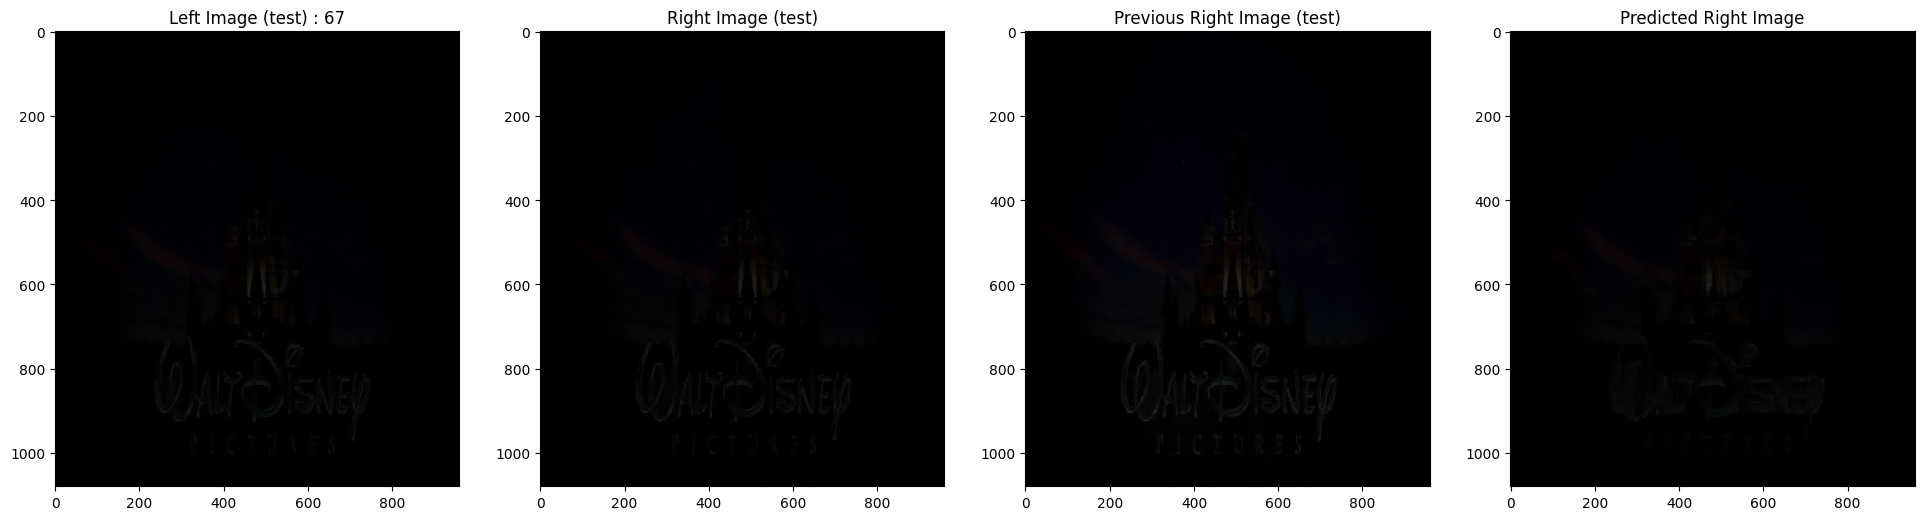

In [63]:
#initiliaze weights
#test data check
from models import SaveBestModel, showRandomTest
no_of_epochs = 30
train_loss = []
test_loss = []
BestModel = SaveBestModel()
for epoch_index in range(no_of_epochs):
    
    print("Epoch: ", epoch_index+1)
    
    model.train()
    
    lossTrain_total, pred_right, pred_channels,left_image, right_image = train_one_epoch()
    
    clear_output(wait=True)
    model.eval()
    #print(loss_train)
    print("Training loss: ", lossTrain_total/len(train_L0))
    train_loss.append(lossTrain_total/len(train_L0))

    lossTest_total = 0
    
    with torch.no_grad():
        for l_test,r_test in zip(test_L0,test_R0):
            r_test = r_test.cuda()
            pred_test,_ = model(l_test.cuda())
            loss_test = loss_fn(pred_test, r_test)
            lossTest_total += loss_test.item()
            
    print("Test loss: ", lossTest_total/len(test_L0))
    test_loss.append(lossTest_total/len(test_L0))
    #print("Learning rate: ", scheduler.get_last_lr())
    
    #save the model if its the best test loss
    BestModel(current_valid_loss  = lossTest_total/len(test_L0),
              epoch = epoch_index+1, 
              model = model ,
              optimizer = optimizer,
              criterion = loss_fn,
              path = '/TrainedModels/BestModel_train10.pth')
        
    # show a random image from the test set
    showRandomTest(testL = test_L0, testR = test_R0, testR1=None, model=model)
    
    #scheduler.step()
    

In [79]:
# Calculate the size of the saved parameters in MB
size_bytes = os.path.getsize('/wood.mp4')
size_mb = size_bytes / (1024 * 1024)

print(f"Size of saved parameters: {size_mb:.2f} MB")

Size of saved parameters: 67.32 MB


In [64]:
train_loss

[0.01916587569941773,
 0.018831529055796548,
 0.018587445922083442,
 0.018429733649736893,
 0.018245998909971785,
 0.01810694856169395,
 0.017968939392872627,
 0.017890384206615133,
 0.01774976267769939,
 0.01762489697461269,
 0.01752629545895928,
 0.017497310069878792,
 0.01738134460819635,
 0.017315808396134044,
 0.01723106068146828,
 0.017160767102892813,
 0.017171657036220977,
 0.017144861082194388,
 0.017098753676387232,
 0.0170345542621946,
 0.016967411461737417,
 0.01691653979046519,
 0.016867863993772617,
 0.016848264435728115,
 0.01682915277443704,
 0.01683495665373676,
 0.016850854417451818,
 0.016835358496142015,
 0.01675744792159982,
 0.016780038626311486]

In [65]:
test_loss

[0.017546774058529706,
 0.017331220481755973,
 0.016627806425365092,
 0.01641766574252338,
 0.016450313469503472,
 0.016293773175498422,
 0.016053057868768,
 0.01577748399386582,
 0.015611529019974727,
 0.015550636491156325,
 0.015398090653434338,
 0.01544241133390276,
 0.01536192382875086,
 0.0152200429351447,
 0.015133999182356316,
 0.01506063005227033,
 0.015008159281868367,
 0.015054554221257142,
 0.014935710104985199,
 0.014934610622134784,
 0.014874590294521586,
 0.014894273562247266,
 0.014777725844550178,
 0.014735202622763278,
 0.014732674315353082,
 0.014804083478002094,
 0.014855646516134703,
 0.01471566923452895,
 0.014773116467288426,
 0.014693590432121805]

In [20]:
train_loss1= train_loss
test_loss1 = test_loss
#appending train and test loss for 30 epochs
# train_loss1.extend(train_loss)
# test_loss1.extend(test_loss)


## Results

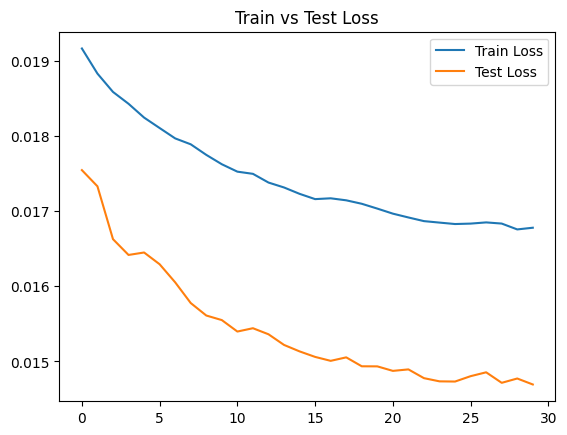

In [66]:
#train vs test plot
train_test_plot(train_loss, test_loss)

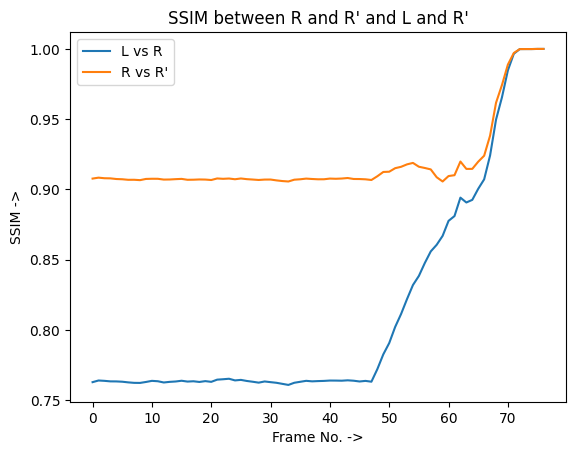

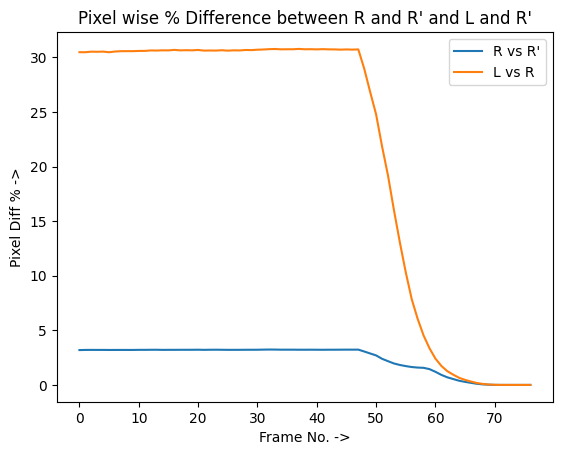

In [67]:
# Pixel Diff % and SSIM over the test set
ssim_over_time(test_L0, test_R0, model)

pixelDiff_over_time(test_L0, test_R0, model)


## Train set

### model with 50 epochs of training

In [ ]:
index_list = [120,220,320, 420,520, 600 ]
for n in index_list:
    l, r,r1, o, idx= randomLRImage(train_L0, train_R0, model, n)
    plot_L_R_pred(l, r,r1, o, idx)

## Test Set

### model with 50 epochs of training

In [ ]:
index_list = [25, 50, 75, 100, 150]
for n in index_list:
    l, r,r1, o, idx= randomLRImage(test_L0, test_R0, model, n)
    plot_L_R_pred(l, r,r1, o, idx)

### Loading the BEST MODEL saved

In [15]:
PATH = '/TrainedModels/BestModel_train10.pth'
model = Net()
model = model.cuda()
optimizer =  optim.Adam(model.parameters(), lr=0.0001)

checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

### TRAIN Data

In [ ]:
index_list = [120,220,320, 420,520, 600]
for n in index_list:
    l, r,r1, o, idx= randomLRImage(train_L0, train_R0, model, n)
    plot_L_R_pred(l, r,r1, o, idx)

### TEST Data

In [ ]:
index_list = [25, 50, 75, 100, 150]
for n in index_list:
    l, r,r1, o, idx= randomLRImage(test_L0, test_R0, model, n)
    plot_L_R_pred(l, r,r1, o, idx)


## Test set behaviour 

In [ ]:
# Pixel Diff % and SSIM over the test set
ssim_over_time(test_L0, test_R0, model)

pixelDiff_over_time(test_L0, test_R0, model)

# Comparing Baselines

In [68]:
from baseline import copy_and_sort_R1,ssimAll_over_time, pixelDiffAll_over_time

### Train data

In [69]:
pathR0 = "/3Danimation_dataset/trainR"
pathL0 = "/3Danimation_dataset/trainL"

train_R0, train_L0, train_R1 = copy_and_sort_R1(pathR0, pathL0)


Previous files at folder /home/pytorch/personal/Deep3D/SelfDeep3D/TempFolder/R0folder deleted successfully!
Previous files at folder /home/pytorch/personal/Deep3D/SelfDeep3D/TempFolder/L0folder deleted successfully!
Previous files at folder /home/pytorch/personal/Deep3D/SelfDeep3D/TempFolder/R1folder deleted successfully!
New folder created at path:  /home/pytorch/personal/Deep3D/SelfDeep3D/TempFolder/R0folder
New folder created at path:  /home/pytorch/personal/Deep3D/SelfDeep3D/TempFolder/L0folder
New folder created at path:  /home/pytorch/personal/Deep3D/SelfDeep3D/TempFolder/R1folder
Images copied to /home/pytorch/personal/Deep3D/SelfDeep3D/TempFolder/R0folder successfully!
Images copied to /home/pytorch/personal/Deep3D/SelfDeep3D/TempFolder/R1folder successfully!
Images copied to /home/pytorch/personal/Deep3D/SelfDeep3D/TempFolder/L0folder successfully!
Images copied and sorted successfully in temp folder!

R0 Samples:
['out-0000002R.jpg', 'out-0000003R.jpg', 'out-0000004R.jpg', 'o

693 693 693


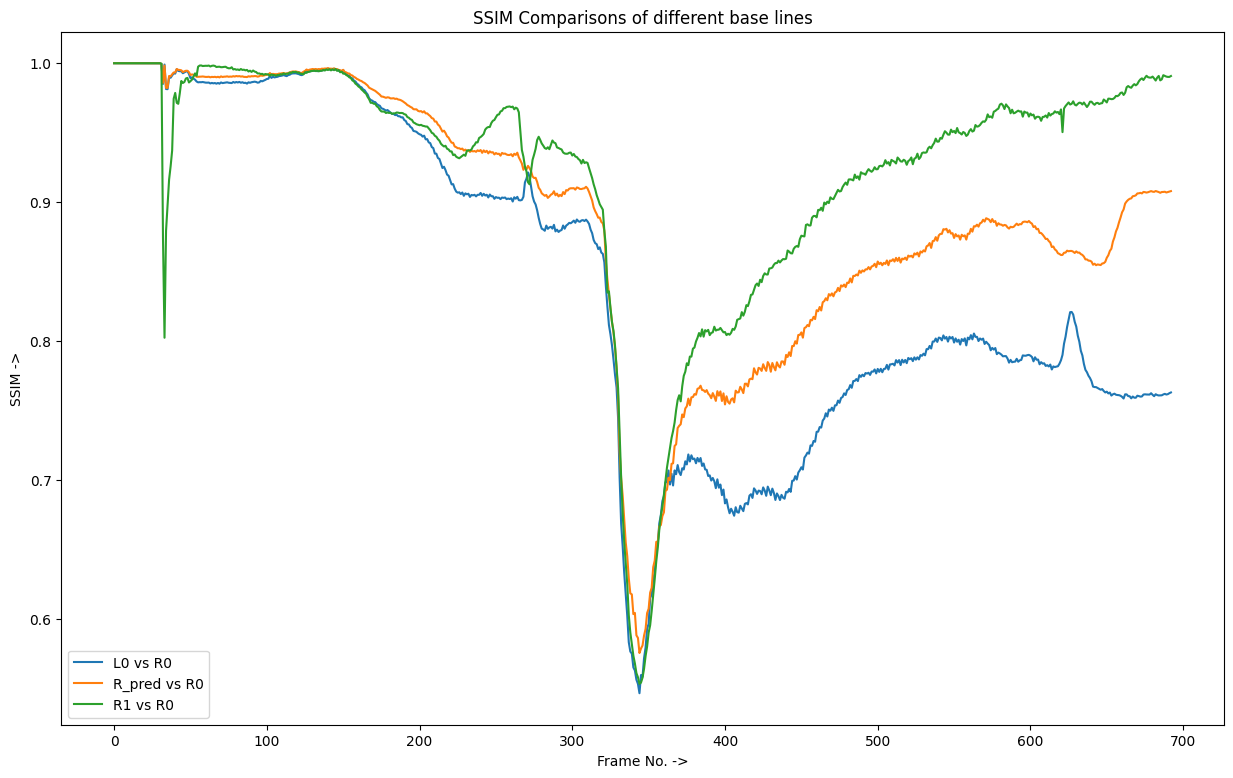

SSIM Avg over the train set LR:  0.8424331244796214
SSIM Avg over the train set R'R:  0.8896688920422894
SSIM Avg over the train set R-1 R:  0.9246669398757802


In [70]:
ssimAvg_lr, ssimAvg_or, ssimAvg_r1r = ssimAll_over_time(train_L0, train_R0, train_R1, model)
print("SSIM Avg over the train set LR: ", sum(ssimAvg_lr)/len(ssimAvg_lr))
print("SSIM Avg over the train set R'R: ", sum(ssimAvg_or)/len(ssimAvg_or))
print("SSIM Avg over the train set R-1 R: ", sum(ssimAvg_r1r)/len(ssimAvg_r1r))

In [19]:
## Check frame numbers(index) with lowest ssim from ssimAvg_lr, ssimAvg_or, ssimAvg_r1r
def lowestSSIM(ssimAvg_lr, ssimAvg_or, ssimAvg_r1r):
    print("Lowest SSIM in LR: ", ssimAvg_lr.index(min(ssimAvg_lr)))
    print("Lowest SSIM in R'R: ", ssimAvg_or.index(min(ssimAvg_or)))
    print("Lowest SSIM in R-1 R: ", ssimAvg_r1r.index(min(ssimAvg_r1r)))


In [20]:
lowestSSIM(ssimAvg_lr, ssimAvg_or, ssimAvg_r1r)

Lowest SSIM in LR:  343
Lowest SSIM in R'R:  351
Lowest SSIM in R-1 R:  343


In [21]:
#Copy the frames around buffer seconds of lowest SSIM to a new folder
path_to_frames = "/3Ddisney_dataset/3Ddisney_frames"
idx = 343
buffer = 2

copy_selected_frames(
    path_to_frames,
    idx,
    buffer=2,
    fps=24,
)

Previous temp folders deleted successfully!
New temp folders created successfully!
Frames copied successfully!
Frames copied at:  /home/pytorch/personal/Deep3D/SelfDeep3D/TempFolder/Video_frames


In [22]:
#making video from frames of the new folder created
input_path="/home/pytorch/personal/Deep3D/SelfDeep3D/TempFolder/Video_frames/"
output_path="/home/pytorch/personal/Deep3D/SelfDeep3D/3Ddisney_dataset/Results"
in_fps=24
out_fps=24

make_video_from_frames(
    input_path="/home/pytorch/personal/Deep3D/SelfDeep3D/TempFolder/Video_frames/",
    output_path="/home/pytorch/personal/Deep3D/SelfDeep3D/3Ddisney_dataset/Results",
    in_fps=24,
    out_fps=24,
)

Frames renamed successfully for compatible with ffmpeg in a sorted manner!
Output folder cleared


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Video created successfully!
Video saved at:  /home/pytorch/personal/Deep3D/SelfDeep3D/3Ddisney_dataset/Results


frame=   96 fps= 20 q=-1.0 Lsize=    2543kB time=00:00:03.87 bitrate=5375.9kbits/s speed=0.794x    
video:2541kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.078556%
[libx264 @ 0x562e1ee29880] frame I:2     Avg QP:17.63  size: 52758
[libx264 @ 0x562e1ee29880] frame P:25    Avg QP:19.38  size: 36461
[libx264 @ 0x562e1ee29880] frame B:69    Avg QP:20.80  size: 22960
[libx264 @ 0x562e1ee29880] consecutive B-frames:  4.2%  0.0%  0.0% 95.8%
[libx264 @ 0x562e1ee29880] mb I  I16..4: 45.7% 52.2%  2.1%
[libx264 @ 0x562e1ee29880] mb P  I16..4: 14.7% 36.7%  1.3%  P16..4: 12.6%  5.0%  3.3%  0.0%  0.0%    skip:26.4%
[libx264 @ 0x562e1ee29880] mb B  I16..4:  4.1% 13.0%  0.2%  B16..8: 15.4%  6.5%  2.5%  direct:13.5%  skip:44.8%  L0:49.4% L1:42.2% BI: 8.4%
[libx264 @ 0x562e1ee29880] 8x8 transform intra:70.8% inter:87.2%
[libx264 @ 0x562e1ee29880] coded y,uvDC,uvAC intra: 39.8% 55.9% 3.1% inter: 11.7% 22.3% 0.9%
[libx264 @ 0x562e1ee29880] i16 v,h,dc,p: 70% 18% 11%  1%


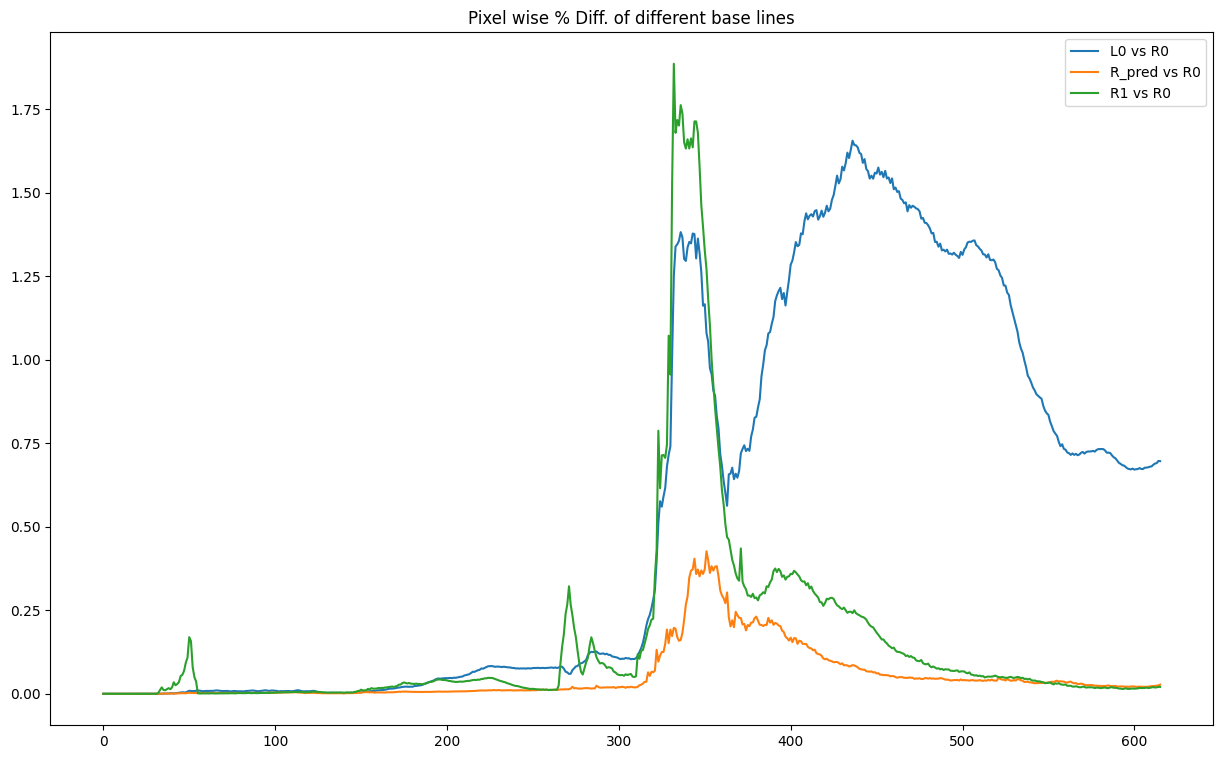

Pixel Diff Avg over the train set between LR:  0.5514884740259737
Pixel Diff Avg over the train set between R'R:  0.05334935064935066
Pixel Diff Avg over the train set between R-1 R:  0.1575232142857142


In [14]:
pixAvg_lr, pixAvg_or, pixAvg_r1r = pixelDiffAll_over_time(train_L0, train_R0, train_R1, model)
print("Pixel Diff Avg over the train set between LR: ", sum(pixAvg_lr)/len(pixAvg_lr))
print("Pixel Diff Avg over the train set between R'R: ", sum(pixAvg_or)/len(pixAvg_or))
print("Pixel Diff Avg over the train set between R-1 R: ", sum(pixAvg_r1r)/len(pixAvg_r1r))

### Test data

In [1]:
pathR0 = "/home/pytorch/personal/Deep3D/SelfDeep3D/3Danimation_dataset/testR"
pathL0 = "/home/pytorch/personal/Deep3D/SelfDeep3D/3Danimation_dataset/testL"

test_R0, test_L0, test_R1 = copy_and_sort_R1(pathR0, pathL0)

NameError: name 'copy_and_sort_R1' is not defined

153 153 153


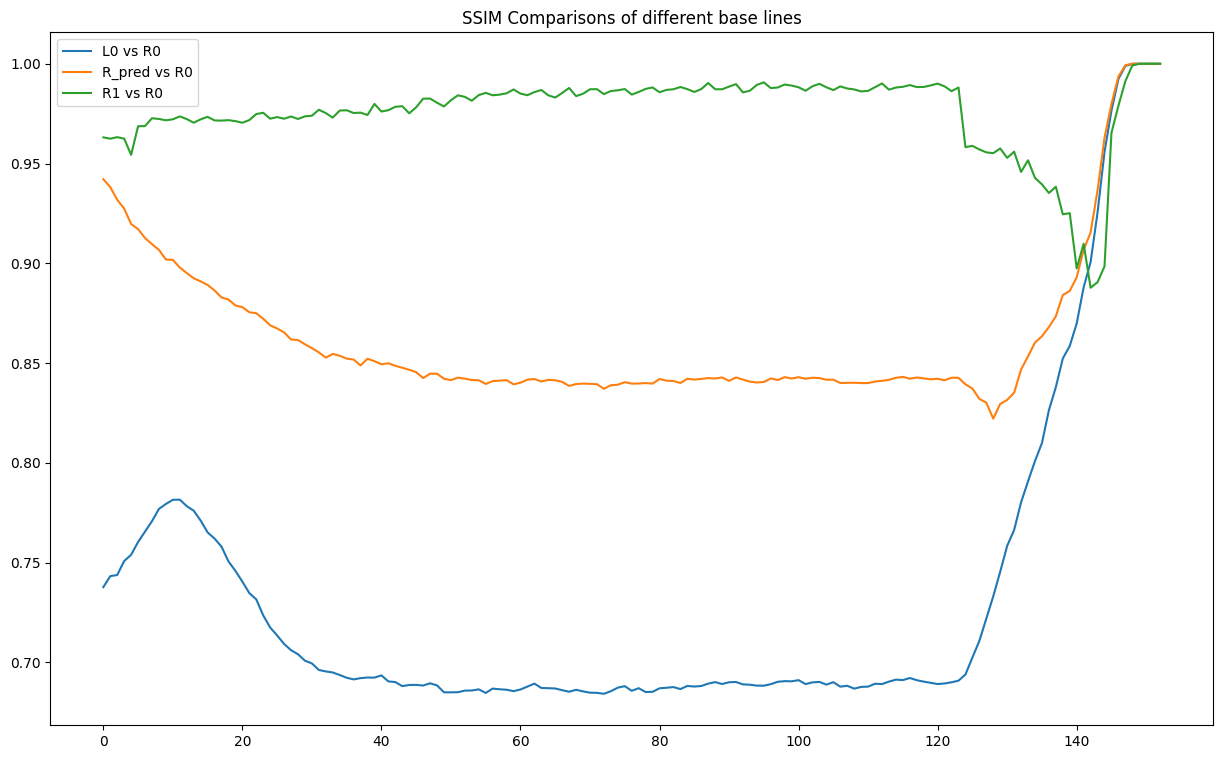

SSIM Avg over the test set LR:  0.7325075833626042
SSIM Avg over the test set R'R:  0.8640998266880808
SSIM Avg over the test set R-1 R:  0.975560156348484


In [18]:
ssimAvg_lr_test, ssimAvg_or_test, ssimAvg_r1r_test = ssimAll_over_time(test_L0, test_R0, test_R1, model)
print("SSIM Avg over the test set LR: ", ssimAvg_lr_test)
print("SSIM Avg over the test set R'R: ", ssimAvg_or_test)
print("SSIM Avg over the test set R-1 R: ", ssimAvg_r1r_test)

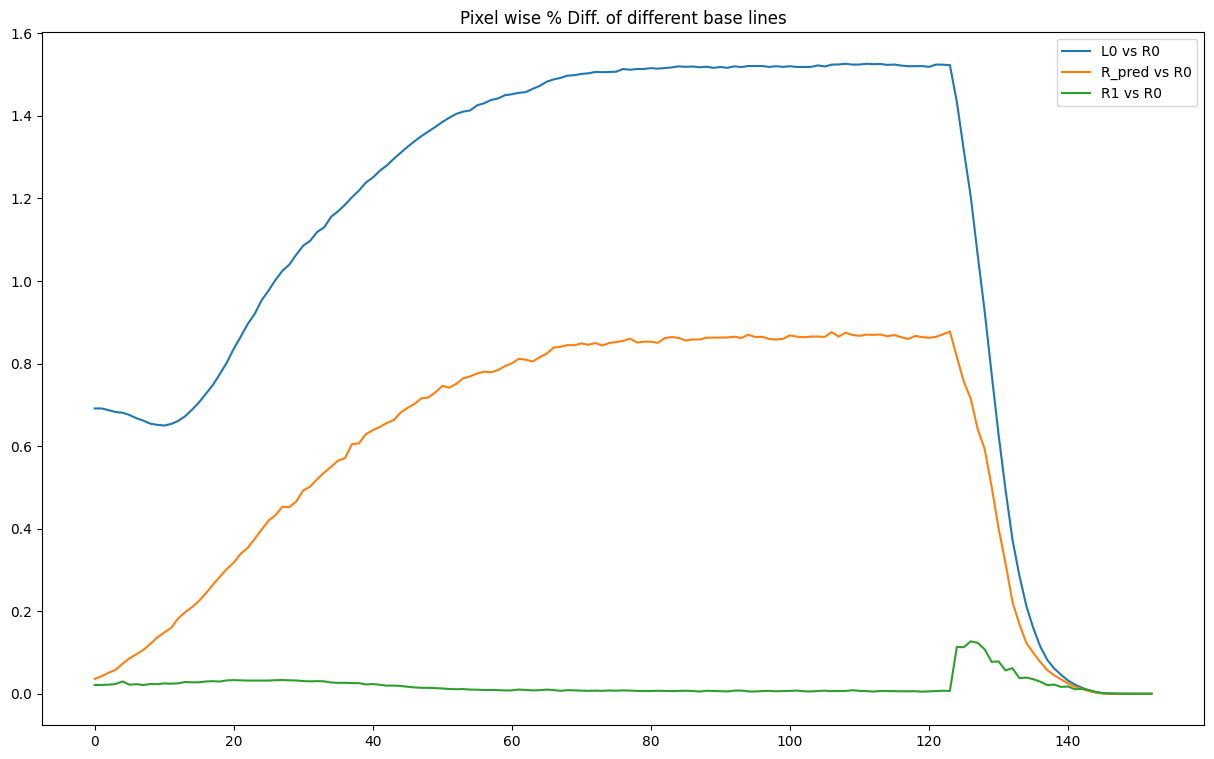

Pixel Diff Avg over the train set between LR:  1.1004398692810453
Pixel Diff Avg over the train set between R'R:  0.5721908496732024
Pixel Diff Avg over the train set between R-1 R:  0.019374509803921566


In [19]:
pixAvg_lr_test, pixAvg_or_test, pixAvg_r1r_test =pixelDiffAll_over_time(test_L0, test_R0, test_R1, model)
print("Pixel Diff Avg over the train set between LR: ", pixAvg_lr_test)
print("Pixel Diff Avg over the train set between R'R: ", pixAvg_or_test)
print("Pixel Diff Avg over the train set between R-1 R: ", pixAvg_r1r_test)